# Clustering


In [1]:
# import the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


In [2]:
# import penguins dataset and drop rowid column
# import penguins dataset and drop rowid column
df = pd.read_csv('../data/01-modified-data/combined_data_pca.csv')

df.head()


,PC1,PC2,DX
0,-1.526932,-0.075691,2.0
1,-1.909297,0.361647,0.0
2,-1.968267,0.623517,2.0
3,-1.996508,0.265812,0.0
4,-1.452855,0.169047,1.0


# Seperate the dataset into features and labels

In [4]:
# Split the dataset in X and y. since this is unsupervised learning, we will not use the y labels. 
#you can choose to normalize the X data by using the StandardScaler function.
#X = df.drop(columns=columns_to_drop)
X =  df.drop(columns='DX') #dropping the y label category_island
# Normalize the features using StandardScaler
##
#X_normalized = scaler.fit_transform(X)


# Perform K-means

In [5]:
# import relevent libraries for clustering. we will use KMeans, AgglomerativeClustering, MeanShift, Birch, 
#and DBSCAN
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift, Birch, DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/bd/fz7166695vq0bg9w400f8zl40000gn/T/ipykernel_35547/1900445977.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Clusters': n_clusters, 'Inertia': kmeans.inertia_}, ignore_index=True)
/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/bd/fz7166695vq0bg9w400f8zl40000gn/T/ipykernel_35547/1900445977.py:20: FutureWarning: The frame.append m

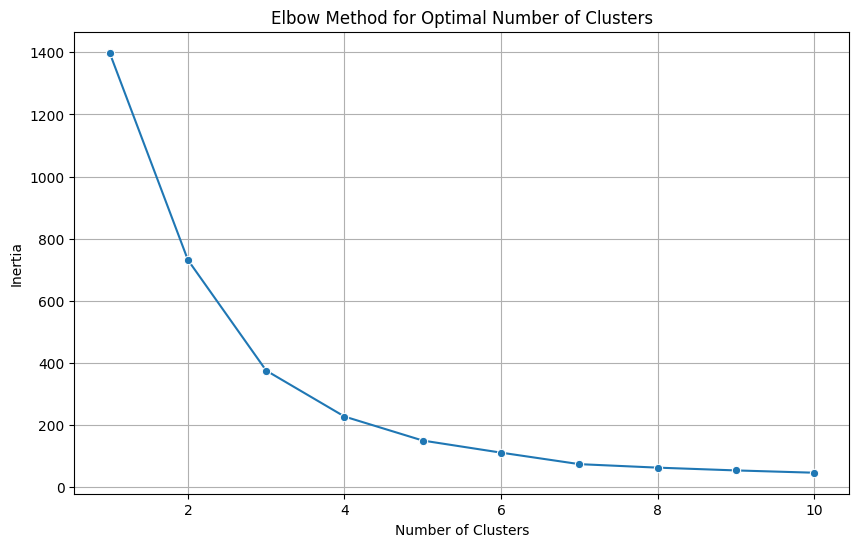

   Clusters DistortionInertia      Inertia
0       1.0               NaN  1398.681135
1       2.0               NaN   731.170100
2       3.0               NaN   374.864204
3       4.0               NaN   226.866490
4       5.0               NaN   149.511630
5       6.0               NaN   110.586121
6       7.0               NaN    73.523535
7       8.0               NaN    62.272642
8       9.0               NaN    53.317909
9      10.0               NaN    45.899763


In [6]:
# for k means clustering we will use the elbow method to find the optimal number of clusters. 
#we will use the inertia_ attribute to find the sum of squared distances of samples to their closest cluster center
#we will use the range of 1 to 10 clusters. plot the inertia_ values for each number of clusters. make sure to save
#it in a dataframe and plot it using matplotlib.
# Create an empty DataFrame to store the results
# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=['Clusters','Distortion' 'Inertia'])

# Sample data (replace this with your data)
data = X

# Define a range of clusters to test
clusters_range = range(1, 11)


# Iterate over the number of clusters
for n_clusters in clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(data)
    results = results.append({'Clusters': n_clusters, 'Inertia': kmeans.inertia_}, ignore_index=True)


# Plot the results using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=results, x='Clusters', y='Inertia', marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()
print(results)

/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


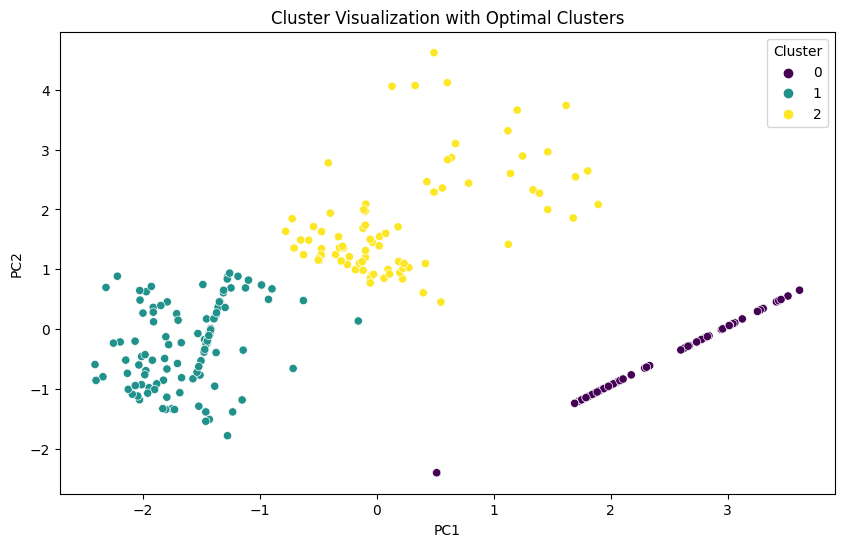

Cluster Centers:
 [[ 1.74948274 -1.18802936]
 [-1.59667124 -0.23573853]
 [ 0.20062981  1.77218748]]
Counts in each Cluster:
 1    120
0    100
2     83
Name: Cluster, dtype: int64


In [7]:
# Assuming you have your data in a variable called 'data'
# And the optimal number of clusters determined earlier is stored in 'optimal_clusters'
optimal_clusters = 3 # replace with your determined optimal number

# Initialize and fit the KMeans model with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=0)
kmeans_optimal.fit(data)

# You can now analyze the cluster centers and the labels
cluster_centers = kmeans_optimal.cluster_centers_
labels = kmeans_optimal.labels_

# Optionally, create a DataFrame for better visualization
results_optimal = pd.DataFrame(data, columns=['PC1', 'PC2'])  
results_optimal['Cluster'] = labels

# Plotting the results (adjust according to your data's features)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_optimal, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.title('Cluster Visualization with Optimal Clusters')
plt.show()

# Optionally, print the cluster centers and counts
print("Cluster Centers:\n", cluster_centers)
print("Counts in each Cluster:\n", results_optimal['Cluster'].value_counts())

The inertia drastically stopped falling significantly at number of clusters at '3'.

# Perform DBSCAN and predict the labels

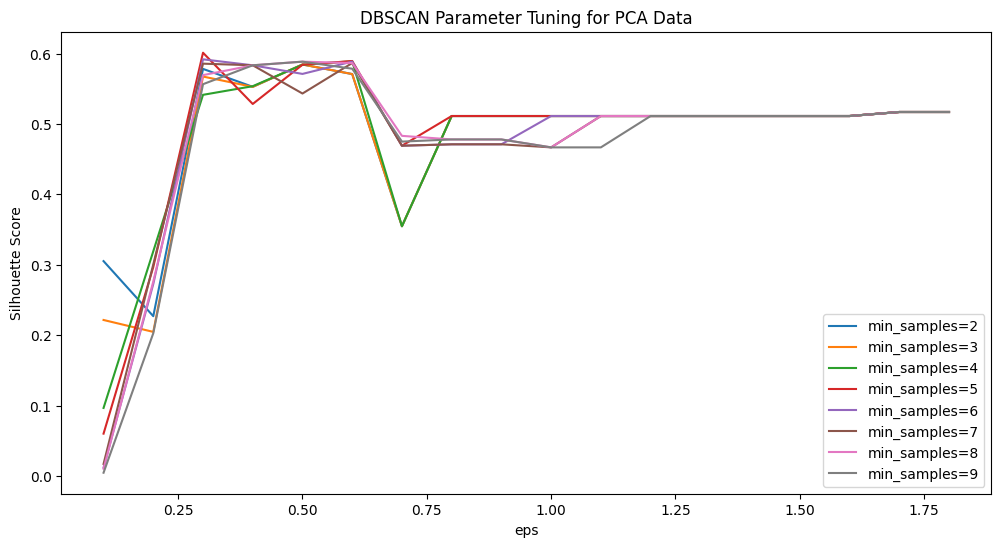

In [8]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Selecting only the principal component columns for clustering
data = data[['PC1', 'PC2']].values

# Parameter space exploration
eps_values = np.arange(0.1, 2.0, 0.1)  # Adjust as needed
min_samples_values = range(2, 10)      # Adjust as needed
scores = []

for eps in eps_values:
    for min_samples in min_samples_values:
        # Apply DBSCAN
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(data)
        labels = db.labels_

        # Silhouette score
        if len(set(labels)) > 1:  # More than one cluster
            score = silhouette_score(data, labels)
            scores.append((eps, min_samples, score))

# Convert to DataFrame for easier analysis
score_df = pd.DataFrame(scores, columns=['eps', 'min_samples', 'score'])

# Plotting
plt.figure(figsize=(12, 6))
for min_samples in min_samples_values:
    subset = score_df[score_df['min_samples'] == min_samples]
    plt.plot(subset['eps'], subset['score'], label=f'min_samples={min_samples}')


plt.xlabel('eps')
plt.ylabel('Silhouette Score')
plt.title('DBSCAN Parameter Tuning for PCA Data')
plt.legend()
plt.show()

The eps values at which the Silhouette Score peaks are potential candidates for optimal clustering. These peaks represent eps values where the clusters are most distinct from each other.
Stability of the score: Besides just looking for the highest peak, we should also consider how stable the score is around that peak. If the score remains relatively high over a range of eps values, it indicates that the clustering is robust to slight variations in eps.

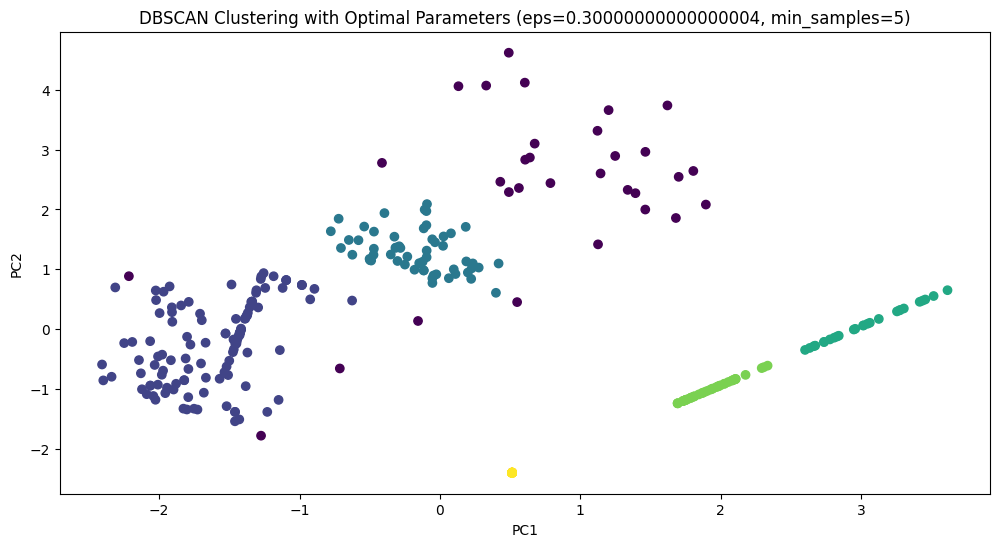

In [9]:
# Find the combination with the highest silhouette score
optimal_params = score_df.loc[score_df['score'].idxmax()]
optimal_eps = optimal_params['eps']
optimal_min_samples = int(optimal_params['min_samples'])

# Running DBSCAN with optimal parameters
optimal_db = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples).fit(data)
optimal_labels = optimal_db.labels_

# Plotting the results with optimal parameters
plt.figure(figsize=(12, 6))
plt.scatter(data[:, 0], data[:, 1], c=optimal_labels, cmap='viridis', marker='o')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'DBSCAN Clustering with Optimal Parameters (eps={optimal_eps}, min_samples={optimal_min_samples})')
plt.show()

# Agglomerative Clustering (Hierarchical clustering)

In [10]:
# Perform Agglomerative Clustering

# create linkage for agglomerative clustering, and the dendrogram for the linkage. Suggest the optimal number of clusters based on 
# the dendrogram.
from scipy.cluster.hierarchy import dendrogram
scaler = StandardScaler()


df = X #X is our X data
data_scaled = scaler.fit_transform(df)

data_scaled = X
# Choose the number of clusters (you can also use other methods to determine this)
n_clusters = 3  # Adjust the number of clusters as needed

# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
labels = agg_clustering.fit_predict(data_scaled)

# Plot a dendrogram (optional, for visualization of hierarchical structure)
from scipy.cluster.hierarchy import linkage

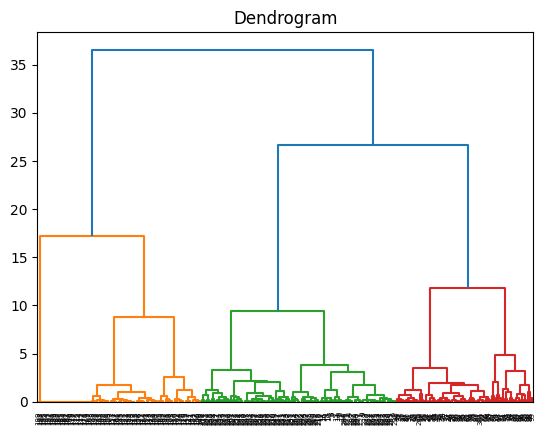

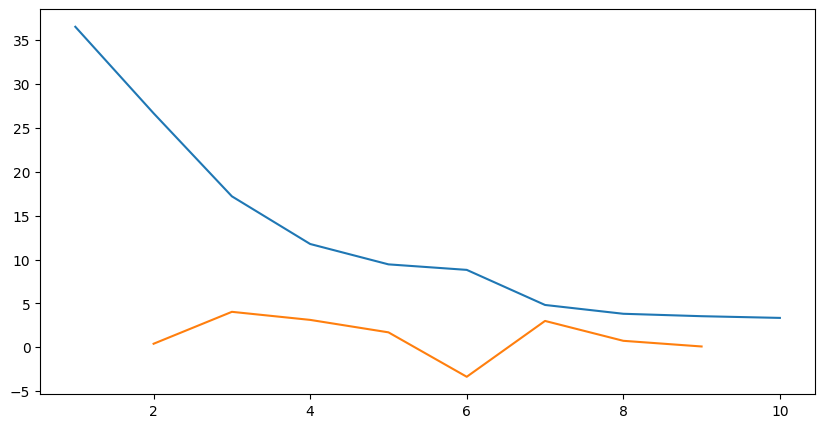

The optimal number of clusters: 3


In [11]:
# Perform hierarchical/agglomerative clustering
linked = linkage(X, method='ward')

dendrogram(linked)
plt.title("Dendrogram")
plt.show()

# Now, 'labels' contains the cluster assignments for each data point in your DataFrame
# You can add these labels to your DataFrame if needed.
df['Cluster'] = labels
# Determine the optimal number of clusters using the Elbow Method
last = linked[-10:, 2]  # Take the last ten distances
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.figure(figsize=(10, 5))
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()

k = acceleration_rev.argmax() + 2  # If idx 0 is the max of this we want 2 clusters
print(f"The optimal number of clusters: {k}")

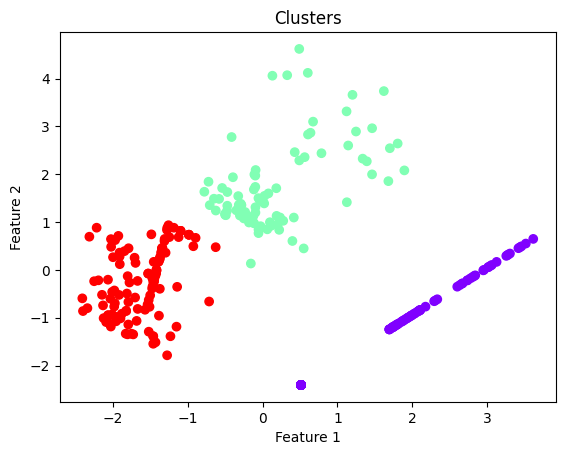

In [12]:
n_clusters = 3  # Adjust based on the dendrogram analysis
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
labels = agg_clustering.fit_predict(data_scaled)

# Optionally, add labels to your DataFrame (if it makes sense for your analysis)
df['Cluster'] = labels

# If you can reduce your data to 2D, you can plot the clusters
# This step depends on the nature of your data
#if df.shape[1] == 2:

plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=labels, cmap='rainbow')
plt.title("Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()